# Sentiment Analysis on U.S Airline Tweets

In [30]:
# Import libraries
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import string
import re

# Setting for display options
pd.options.mode.chained_assignment = None

# Import dataset
df = pd.read_csv("train.csv")
display(df.head(20))
display(df.shape)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0    Tr_tweet_1           neutral                        1.0000   
1    Tr_tweet_2          positive                        0.3486   
2    Tr_tweet_3           neutral                        0.6837   
3    Tr_tweet_4          negative                        1.0000   
4    Tr_tweet_5          negative                        1.0000   
5    Tr_tweet_6          negative                        1.0000   
6    Tr_tweet_7          positive                        0.6745   
7    Tr_tweet_8          positive                        0.6559   
8    Tr_tweet_9          positive                        1.0000   
9   Tr_tweet_10          positive                        1.0000   
10  Tr_tweet_11          positive                        1.0000   
11  Tr_tweet_12          positive                        1.0000   
12  Tr_tweet_13          negative                        0.6842   
13  Tr_tweet_14          positive                        1.0000   
14  Tr_tweet_15          positive                        1.0000   
15  Tr_tweet_16          positive                        1.0000   
16  Tr_tweet_17          negative                        0.6705   
17  Tr_tweet_18          positive                        1.0000   
18  Tr_tweet_19          positive                        1.0000   
19  Tr_tweet_20           neutral                        1.0000   

   negativereason  negativereason_confidence         airline             name  \
0             NaN                        NaN  Virgin America          cairdin   
1             NaN                     0.0000  Virgin America         jnardino   
2             NaN                        NaN  Virgin America       yvonnalynn   
3      Bad Flight                     0.7033  Virgin America         jnardino   
4      Can't Tell                     1.0000  Virgin America         jnardino   
5      Can't Tell                     0.6842  Virgin America         jnardino   
6             NaN                     0.0000  Virgin America       cjmcginnis   
7             NaN                        NaN  Virgin America         dhepburn   
8             NaN                        NaN  Virgin America       YupitsTate   
9             NaN                        NaN  Virgin America     HyperCamiLax   
10            NaN                        NaN  Virgin America     HyperCamiLax   
11            NaN                        NaN  Virgin America         sjespers   
12    Late Flight                     0.3684  Virgin America  smartwatermelon   
13            NaN                        NaN  Virgin America    ItzBrianHunty   
14            NaN                        NaN  Virgin America     thebrandiray   
15            NaN                        NaN  Virgin America        JNLpierce   
16     Can't Tell                     0.3614  Virgin America           MISSGJ   
17            NaN                        NaN  Virgin America           DT_Les   
18            NaN                        NaN  Virgin America       ElvinaBeck   
19            NaN                        NaN  Virgin America     rjlynch21086   

    retweet_count                                               text  \
0             0.0                @VirginAmerica What @dhepburn said.   
1             0.0  @VirginAmerica plus you've added commercials t...   
2             0.0  @VirginAmerica I didn't today... Must mean I n...   
3             0.0  @VirginAmerica it's really aggressive to blast...   
4             0.0  @VirginAmerica and it's a really big bad thing...   
5             0.0  @VirginAmerica seriously would pay $30 a fligh...   
6             0.0  @VirginAmerica yes, nearly every time I fly VX...   
7             0.0    @virginamerica Well, I didn't…but NOW I DO! :-D   
8             0.0  @VirginAmerica it was amazing, and arrived an ...   
9             0.0                               @VirginAmerica I &lt   
10            0.0  @VirginAmerica This is such a great deal! Alre...   
11            0.0                

(3339, 12)

# Exploratory Data Analysis (EDA)

In [31]:
# Plot histogram to check overall distribution of airline sentiment
fig = px.histogram(df, x="airline_sentiment")
fig.update_traces(marker_color="turquoise", marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Distribution of Airline Sentiment')
fig.show()

In [32]:
# Extract attributes associated with this project
df_tweet  = pd.DataFrame(df[['airline', 'airline_sentiment', 'text']])
df_tweet.head(10)

airline airline_sentiment  \
0  Virgin America           neutral   
1  Virgin America          positive   
2  Virgin America           neutral   
3  Virgin America          negative   
4  Virgin America          negative   
5  Virgin America          negative   
6  Virgin America          positive   
7  Virgin America          positive   
8  Virgin America          positive   
9  Virgin America          positive   

                                                text  
0                @VirginAmerica What @dhepburn said.  
1  @VirginAmerica plus you've added commercials t...  
2  @VirginAmerica I didn't today... Must mean I n...  
3  @VirginAmerica it's really aggressive to blast...  
4  @VirginAmerica and it's a really big bad thing...  
5  @VirginAmerica seriously would pay $30 a fligh...  
6  @VirginAmerica yes, nearly every time I fly VX...  
7    @virginamerica Well, I didn't…but NOW I DO! :-D  
8  @VirginAmerica it was amazing, and arrived an ...  
9                               @VirginAmerica I &lt

In [33]:
# Select rows from dataframe
x = df_tweet.iloc[:, :]

# Sum of null data based on attributes
x.isnull().sum()

airline              1
airline_sentiment    0
text                 1
dtype: int64

In [34]:
# Drop the row contain null value
df_tweet = df_tweet.dropna(axis=0, how='any')
display(df_tweet.shape)

(3338, 3)

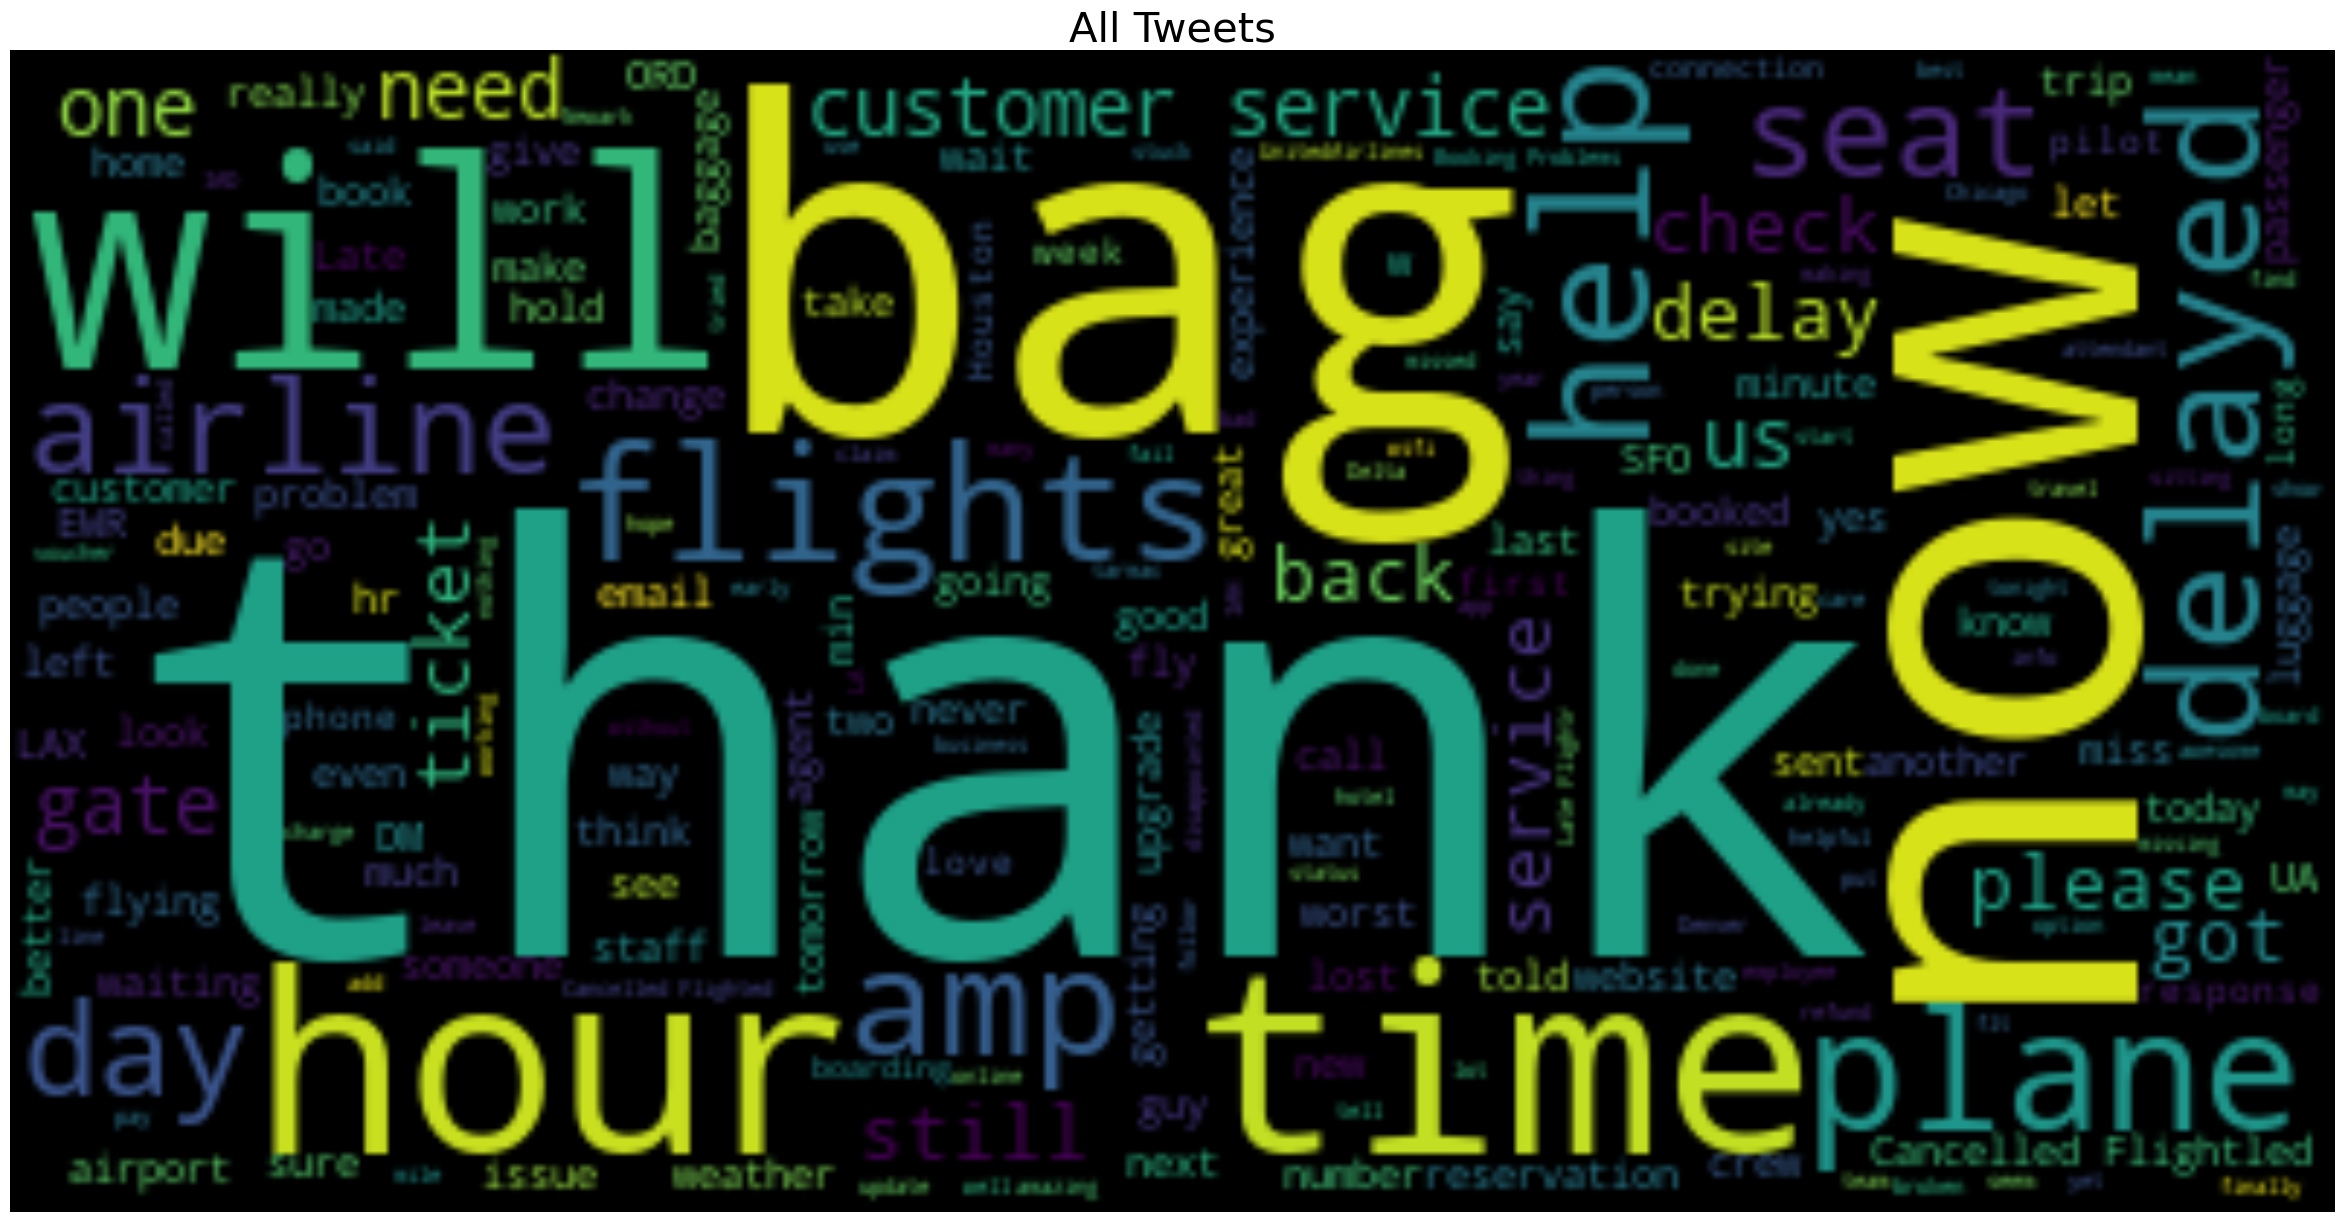

In [35]:
# Create stopword list for wordcloud visualization:
stopwords = set(STOPWORDS)
stopwords.update(["flight", "united", "VirginAmerica", "t", "co", "u"])

# Generate wordcloud for overall tweets
text_ALL = " ".join(review for review in df_tweet.text)
wordcloud = WordCloud(stopwords=stopwords).generate(text_ALL)

plt.figure(figsize=(30,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('All Tweets', fontsize=30)
plt.axis("off")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

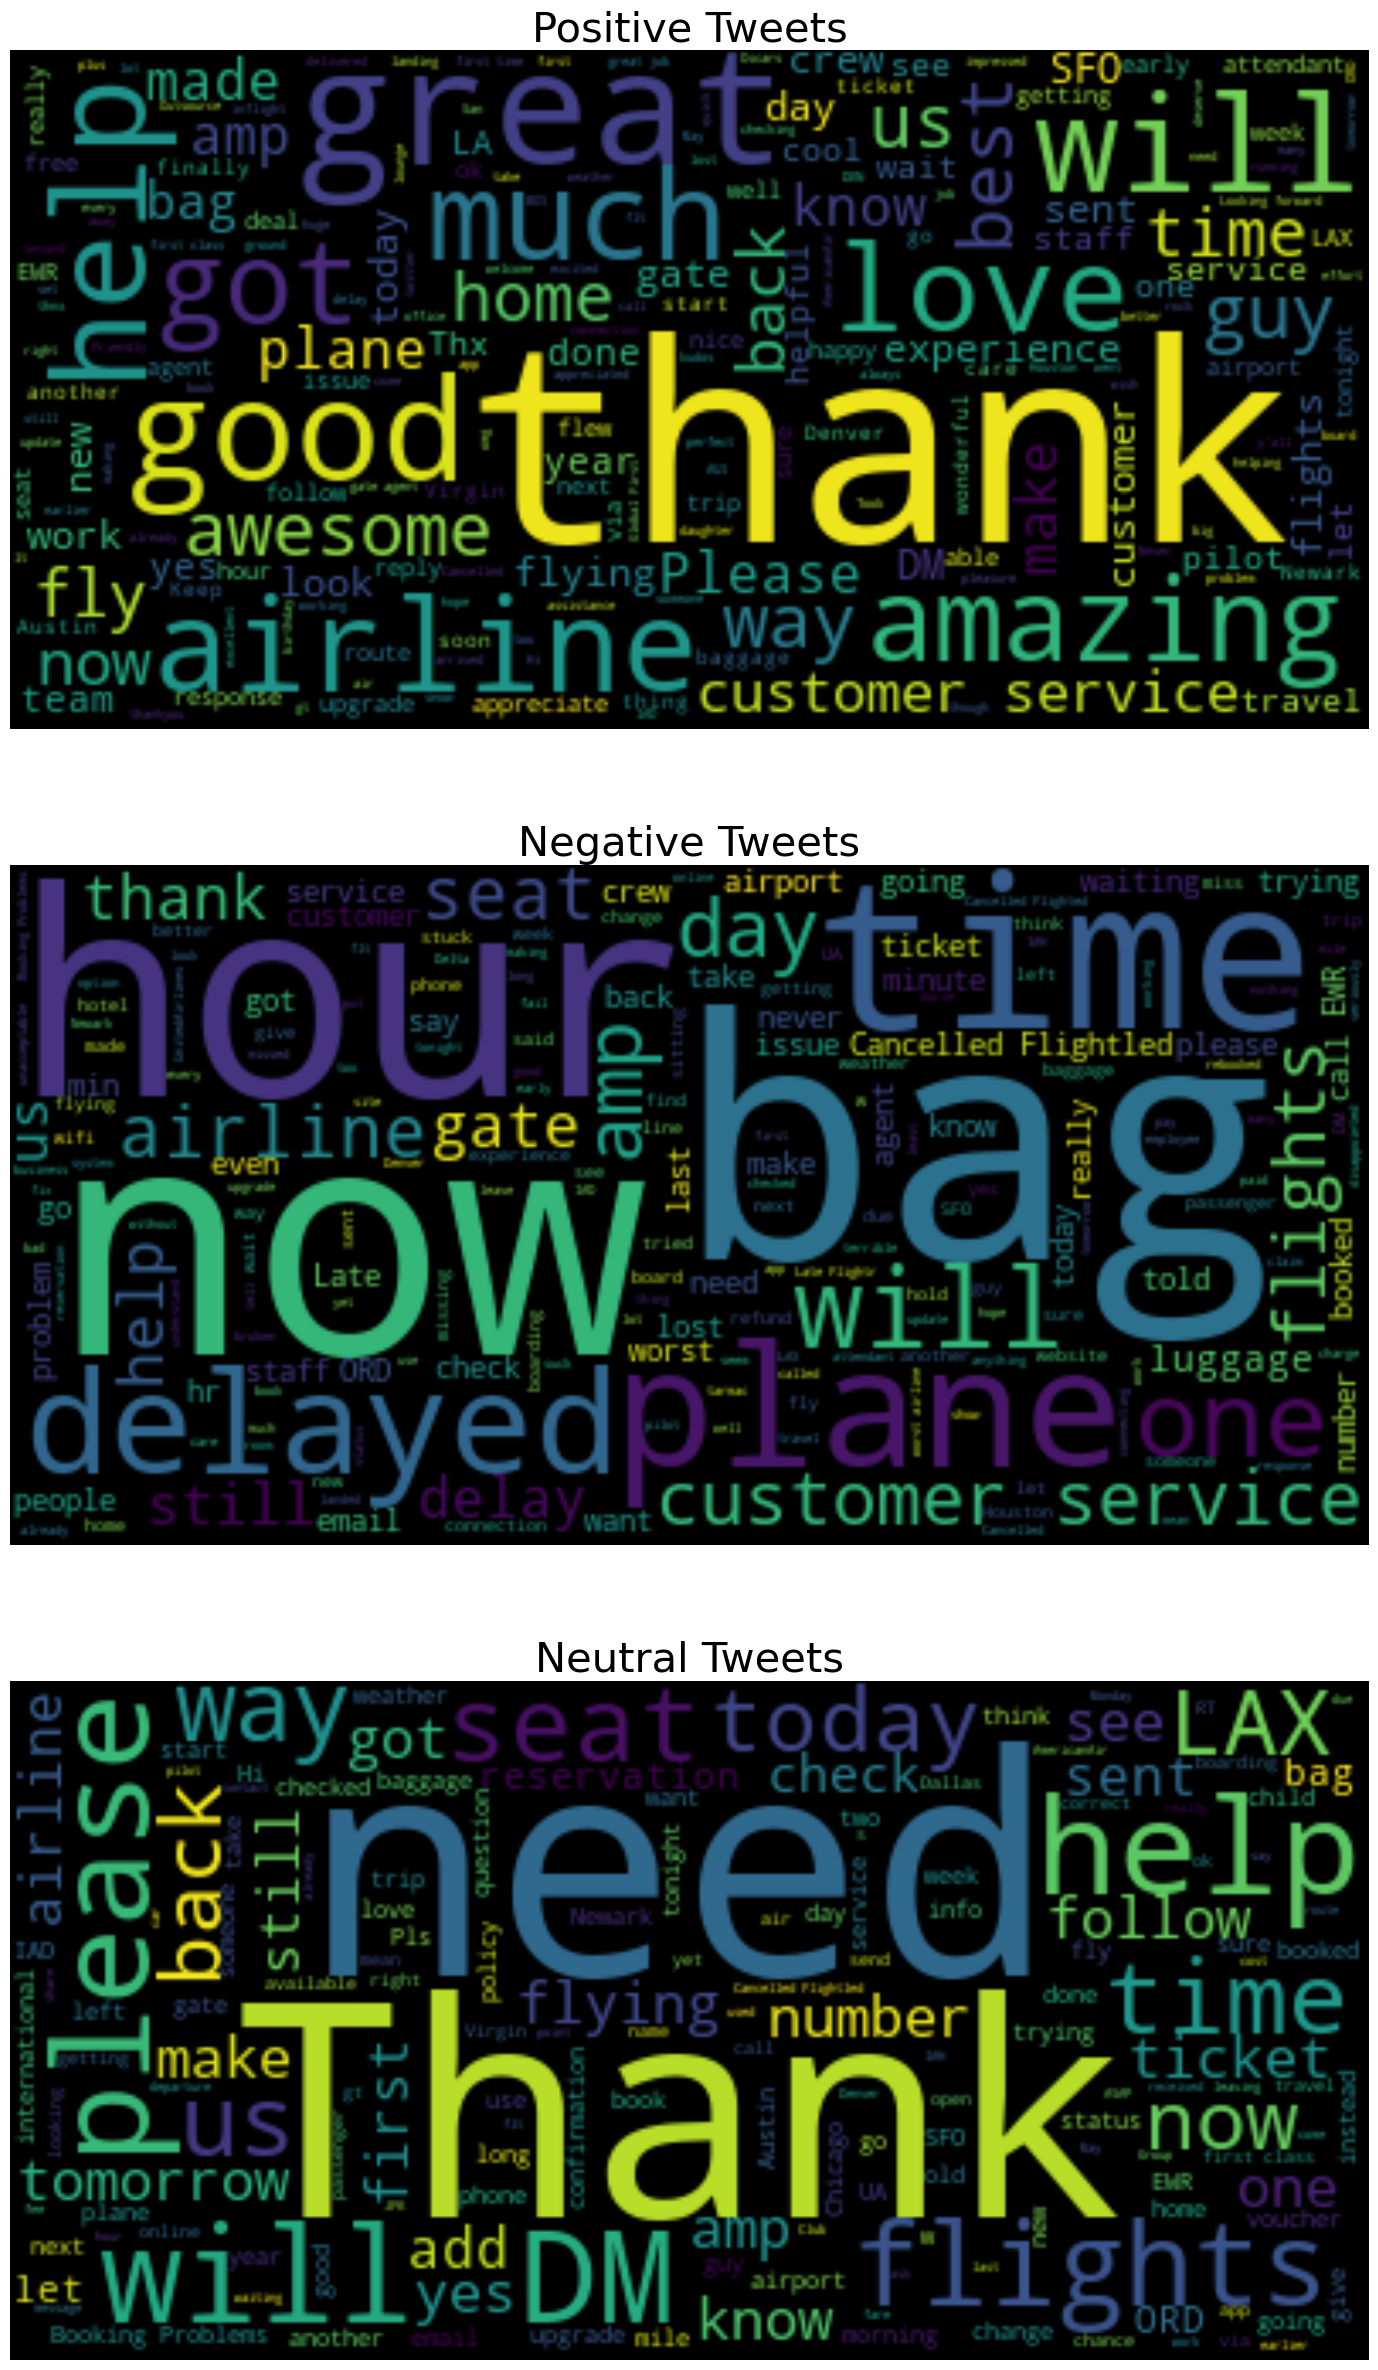

In [36]:
# Generate wordcloud for positive, negative, and neutral tweets respectively
df_POS = df_tweet[df_tweet['airline_sentiment']=='positive']
df_NEG = df_tweet[df_tweet['airline_sentiment']=='negative']
df_NEU = df_tweet[df_tweet['airline_sentiment']=='neutral']

text_POS = " ".join(review for review in df_POS.text)
text_NEG = " ".join(review for review in df_NEG.text)
text_NEU = " ".join(review for review in df_NEU.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
wordcloud_POS = WordCloud(stopwords=stopwords).generate(text_POS)
wordcloud_NEG = WordCloud(stopwords=stopwords).generate(text_NEG)
wordcloud_NEU = WordCloud(stopwords=stopwords).generate(text_NEU)


# Display the generated image:
ax[0].imshow(wordcloud_POS, interpolation='bilinear')
ax[0].set_title('Positive Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_NEG, interpolation='bilinear')
ax[1].set_title('Negative Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NEU, interpolation='bilinear')
ax[2].set_title('Neutral Tweets',fontsize=30)
ax[2].axis('off')

# Text Cleaning

### Remove Punctuations

In [37]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df_tweet['text_punct'] = df_tweet['text'].apply(lambda x: remove_punct(x))
df_tweet.head(10)

airline airline_sentiment  \
0  Virgin America           neutral   
1  Virgin America          positive   
2  Virgin America           neutral   
3  Virgin America          negative   
4  Virgin America          negative   
5  Virgin America          negative   
6  Virgin America          positive   
7  Virgin America          positive   
8  Virgin America          positive   
9  Virgin America          positive   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   
5  @VirginAmerica seriously would pay $30 a fligh...   
6  @VirginAmerica yes, nearly every time I fly VX...   
7    @virginamerica Well, I didn't…but NOW I DO! :-D   
8  @VirginAmerica it was amazing, and arrived an ...   
9                               @VirginAmerica I &lt   

                                          text_punct  
0                   VirginAmerica What dhepburn said  
1  VirginAmerica plus youve added commercials to ...  
2  VirginAmerica I didnt today Must mean I need t...  
3  VirginAmerica its really aggressive to blast o...  
4  VirginAmerica and its a really big bad thing a...  
5  VirginAmerica seriously would pay  a flight fo...  
6  VirginAmerica yes nearly every time I fly VX t...  
7          virginamerica Well I didnt…but NOW I DO D  
8  VirginAmerica it was amazing and arrived an ho...  
9                                 VirginAmerica I lt

### Tokenization

In [38]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df_tweet['text_tokenized'] = df_tweet['text_punct'].apply(lambda x: tokenization(x.lower()))
df_tweet.head(10)

airline airline_sentiment  \
0  Virgin America           neutral   
1  Virgin America          positive   
2  Virgin America           neutral   
3  Virgin America          negative   
4  Virgin America          negative   
5  Virgin America          negative   
6  Virgin America          positive   
7  Virgin America          positive   
8  Virgin America          positive   
9  Virgin America          positive   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   
5  @VirginAmerica seriously would pay $30 a fligh...   
6  @VirginAmerica yes, nearly every time I fly VX...   
7    @virginamerica Well, I didn't…but NOW I DO! :-D   
8  @VirginAmerica it was amazing, and arrived an ...   
9                               @VirginAmerica I &lt   

                                          text_punct  \
0                   VirginAmerica What dhepburn said   
1  VirginAmerica plus youve added commercials to ...   
2  VirginAmerica I didnt today Must mean I need t...   
3  VirginAmerica its really aggressive to blast o...   
4  VirginAmerica and its a really big bad thing a...   
5  VirginAmerica seriously would pay  a flight fo...   
6  VirginAmerica yes nearly every time I fly VX t...   
7          virginamerica Well I didnt…but NOW I DO D   
8  VirginAmerica it was amazing and arrived an ho...   
9                                 VirginAmerica I lt   

                                      text_tokenized  
0              [virginamerica, what, dhepburn, said]  
1  [virginamerica, plus, youve, added, commercial...  
2  [virginamerica, i, didnt, today, must, mean, i...  
3  [virginamerica, its, really, aggressive, to, b...  
4  [virginamerica, and, its, a, really, big, bad,...  
5  [virginamerica, seriously, would, pay, a, flig...  
6  [virginamerica, yes, nearly, every, time, i, f...  
7  [virginamerica, well, i, didnt, but, now, i, d...  
8  [virginamerica, it, was, amazing, and, arrived...  
9                             [virginamerica, i, lt]

### Remove stopwords

In [39]:
import nltk
from nltk.corpus import stopwords

# A list of English stopwords in NLTK
stopword = stopwords.words('english')

#print(stopword)

# Can extend the stopword list here
stopword.extend(['must', 'every'])

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_tweet['text_nonstop'] = df_tweet['text_tokenized'].apply(lambda x: remove_stopwords(x))
df_tweet.head(10)

airline airline_sentiment  \
0  Virgin America           neutral   
1  Virgin America          positive   
2  Virgin America           neutral   
3  Virgin America          negative   
4  Virgin America          negative   
5  Virgin America          negative   
6  Virgin America          positive   
7  Virgin America          positive   
8  Virgin America          positive   
9  Virgin America          positive   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   
5  @VirginAmerica seriously would pay $30 a fligh...   
6  @VirginAmerica yes, nearly every time I fly VX...   
7    @virginamerica Well, I didn't…but NOW I DO! :-D   
8  @VirginAmerica it was amazing, and arrived an ...   
9                               @VirginAmerica I &lt   

                                          text_punct  \
0                   VirginAmerica What dhepburn said   
1  VirginAmerica plus youve added commercials to ...   
2  VirginAmerica I didnt today Must mean I need t...   
3  VirginAmerica its really aggressive to blast o...   
4  VirginAmerica and its a really big bad thing a...   
5  VirginAmerica seriously would pay  a flight fo...   
6  VirginAmerica yes nearly every time I fly VX t...   
7          virginamerica Well I didnt…but NOW I DO D   
8  VirginAmerica it was amazing and arrived an ho...   
9                                 VirginAmerica I lt   

                                      text_tokenized  \
0              [virginamerica, what, dhepburn, said]   
1  [virginamerica, plus, youve, added, commercial...   
2  [virginamerica, i, didnt, today, must, mean, i...   
3  [virginamerica, its, really, aggressive, to, b...   
4  [virginamerica, and, its, a, really, big, bad,...   
5  [virginamerica, seriously, would, pay, a, flig...   
6  [virginamerica, yes, nearly, every, time, i, f...   
7  [virginamerica, well, i, didnt, but, now, i, d...   
8  [virginamerica, it, was, amazing, and, arrived...   
9                             [virginamerica, i, lt]   

                                        text_nonstop  
0                    [virginamerica, dhepburn, said]  
1  [virginamerica, plus, youve, added, commercial...  
2  [virginamerica, didnt, today, mean, need, take...  
3  [virginamerica, really, aggressive, blast, obn...  
4           [virginamerica, really, big, bad, thing]  
5  [virginamerica, seriously, would, pay, flight,...  
6  [virginamerica, yes, nearly, time, fly, vx, ea...  
7                       [virginamerica, well, didnt]  
8  [virginamerica, amazing, arrived, hour, early,...  
9                                [virginamerica, lt]

### Stemming

In [41]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df_tweet['text_stemmed'] = df_tweet['text_nonstop'].apply(lambda x: stemming(x))
df_tweet.head(10)

airline airline_sentiment  \
0  Virgin America           neutral   
1  Virgin America          positive   
2  Virgin America           neutral   
3  Virgin America          negative   
4  Virgin America          negative   
5  Virgin America          negative   
6  Virgin America          positive   
7  Virgin America          positive   
8  Virgin America          positive   
9  Virgin America          positive   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   
5  @VirginAmerica seriously would pay $30 a fligh...   
6  @VirginAmerica yes, nearly every time I fly VX...   
7    @virginamerica Well, I didn't…but NOW I DO! :-D   
8  @VirginAmerica it was amazing, and arrived an ...   
9                               @VirginAmerica I &lt   

                                          text_punct  \
0                   VirginAmerica What dhepburn said   
1  VirginAmerica plus youve added commercials to ...   
2  VirginAmerica I didnt today Must mean I need t...   
3  VirginAmerica its really aggressive to blast o...   
4  VirginAmerica and its a really big bad thing a...   
5  VirginAmerica seriously would pay  a flight fo...   
6  VirginAmerica yes nearly every time I fly VX t...   
7          virginamerica Well I didnt…but NOW I DO D   
8  VirginAmerica it was amazing and arrived an ho...   
9                                 VirginAmerica I lt   

                                      text_tokenized  \
0              [virginamerica, what, dhepburn, said]   
1  [virginamerica, plus, youve, added, commercial...   
2  [virginamerica, i, didnt, today, must, mean, i...   
3  [virginamerica, its, really, aggressive, to, b...   
4  [virginamerica, and, its, a, really, big, bad,...   
5  [virginamerica, seriously, would, pay, a, flig...   
6  [virginamerica, yes, nearly, every, time, i, f...   
7  [virginamerica, well, i, didnt, but, now, i, d...   
8  [virginamerica, it, was, amazing, and, arrived...   
9                             [virginamerica, i, lt]   

                                        text_nonstop  \
0                    [virginamerica, dhepburn, said]   
1  [virginamerica, plus, youve, added, commercial...   
2  [virginamerica, didnt, today, mean, need, take...   
3  [virginamerica, really, aggressive, blast, obn...   
4           [virginamerica, really, big, bad, thing]   
5  [virginamerica, seriously, would, pay, flight,...   
6  [virginamerica, yes, nearly, time, fly, vx, ea...   
7                       [virginamerica, well, didnt]   
8  [virginamerica, amazing, arrived, hour, early,...   
9                                [virginamerica, lt]   

                                        text_stemmed  
0                    [virginamerica, dhepburn, said]  
1  [virginamerica, plu, youv, ad, commerci, exper...  
2  [virginamerica, didnt, today, mean, need, take...  
3  [virginamerica, realli, aggress, blast, obnoxi...  
4           [virginamerica, realli, big, bad, thing]  
5  [virginamerica, serious, would, pay, flight, s...  
6  [virginamerica, ye, nearli, time, fli, vx, ear...  
7                       [virginamerica, well, didnt]  
8  [virginamerica, amaz, arriv, hour, earli, your...  
9                                [virginamerica, lt]

### Split Dataset

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_tweet['text'], df_tweet['airline_sentiment'], test_size=0.25, stratify=df_tweet['airline_sentiment'], random_state=40)

print('Training:')
print('X: {} rows \nY: {} rows'.format(X_train.shape[0], y_train.shape[0]))
print('\nTesting')
print('X: {} rows \nY: {} rows'.format(X_test.shape[0], y_test.shape[0]))

Training:
X: 2503 rows 
Y: 2503 rows

Testing
X: 835 rows 
Y: 835 rows


# Model Training

# Machine learning-based classifiers

### Naïve Bayes

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

nb_classifier = Pipeline([('tfid',TfidfVectorizer(stop_words=stopword)), ('nb', MultinomialNB())])

nb_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [44]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = nb_classifier.predict(X_test)
# nb_f1 = f1_score(y_pred, y_test, average='weighted', labels=np.unique(y_pred))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

nb_score = nb_classifier.score(X_test, y_test)
print("Accuracy:", nb_score)

              precision    recall  f1-score   support

    negative       0.66      1.00      0.80       534
     neutral       0.87      0.08      0.14       170
    positive       0.67      0.06      0.11       131

    accuracy                           0.66       835
   macro avg       0.73      0.38      0.35       835
weighted avg       0.70      0.66      0.56       835

Accuracy: 0.6646706586826348


### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc_classifier = Pipeline([('tfid',TfidfVectorizer(stop_words=stopword)), ('rfc', RandomForestClassifier())])
rfc_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rfc', RandomForestClassifier())])

In [46]:
y_pred = rfc_classifier.predict(X_test)
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

rfc_score = rfc_classifier.score(X_test, y_test)
print("Accuracy:", rfc_score)

              precision    recall  f1-score   support

    negative       0.75      0.95      0.84       534
     neutral       0.57      0.26      0.36       170
    positive       0.73      0.47      0.57       131

    accuracy                           0.73       835
   macro avg       0.69      0.56      0.59       835
weighted avg       0.71      0.73      0.70       835

Accuracy: 0.7341317365269461


### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

reg_classifier = Pipeline([('tfid',TfidfVectorizer(stop_words=stopword)), ('reg', LogisticRegression(solver='lbfgs', multi_class='auto'))])
reg_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('reg', LogisticRegression())])

In [48]:
y_pred = reg_classifier.predict(X_test)
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

reg_score = reg_classifier.score(X_test, y_test)
print("Accuracy:", reg_score)

              precision    recall  f1-score   support

    negative       0.75      0.97      0.85       534
     neutral       0.72      0.29      0.42       170
    positive       0.75      0.46      0.57       131

    accuracy                           0.75       835
   macro avg       0.74      0.57      0.61       835
weighted avg       0.75      0.75      0.72       835

Accuracy: 0.7497005988023953


### Support Vector Machine

In [49]:
from sklearn.svm import LinearSVC

svm_classifier = Pipeline([('tfid',TfidfVectorizer(stop_words=stopword)), ('svc', LinearSVC())])
svm_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('svc', LinearSVC())])

In [50]:
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

svm_score = svm_classifier.score(X_test, y_test)
print("Accuracy:", svm_score)

              precision    recall  f1-score   support

    negative       0.80      0.91      0.85       534
     neutral       0.58      0.38      0.46       170
    positive       0.65      0.56      0.61       131

    accuracy                           0.75       835
   macro avg       0.68      0.62      0.64       835
weighted avg       0.73      0.75      0.73       835

Accuracy: 0.7485029940119761


# Lexicon-based approach

### Textblob

In [51]:
from textblob import TextBlob

# polarity describe the sentiment values
# -1 = negative, 1 = positive
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# subjectivity describe opinion is lean toward personal or rational
# the higher the score, the more personal opnion based
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
    if score <= -0.05:
        return 'negative'
    elif score >= 0.05:
        return 'positive'
    else:
        return 'neutral'
    
df_tweet['textblob_subjectivity'] = df_tweet['text_punct'].apply(getSubjectivity)
df_tweet['textblob_polarity'] = df_tweet['text_punct'].apply(getPolarity)
df_tweet['textblob_prediction'] = df_tweet['textblob_polarity'].apply(getAnalysis)

In [52]:
df_tweet['textblob_match'] = np.where(df_tweet["airline_sentiment"] == df_tweet["textblob_prediction"], True, False)
correct_guess = df_tweet['textblob_match'].value_counts()[True]
wrong_guess = df_tweet['textblob_match'].value_counts()[False]

accuracy = correct_guess / (df_tweet.shape[0])
print("Accuracy:", accuracy)

Accuracy: 0.44847213900539246


In [53]:
print(classification_report(df_tweet['airline_sentiment'], df_tweet['textblob_prediction']))

              precision    recall  f1-score   support

    negative       0.88      0.33      0.48      2134
     neutral       0.30      0.61      0.40       679
    positive       0.33      0.71      0.45       525

    accuracy                           0.45      3338
   macro avg       0.50      0.55      0.44      3338
weighted avg       0.67      0.45      0.46      3338



### Vader

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def getVaderPolarity(text):
    return analyser.polarity_scores(text)

def getVaderAnalysis(score):
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
df_tweet['vader_polarity'] = df_tweet['text_punct'].apply(getVaderPolarity)
df_tweet['vader_prediction'] = df_tweet['vader_polarity'].apply(getVaderAnalysis)

In [55]:
df_tweet['vader_match'] = np.where(df_tweet["airline_sentiment"] == df_tweet["vader_prediction"], True, False)
correct_guess = df_tweet['vader_match'].value_counts()[True]
wrong_guess = df_tweet['vader_match'].value_counts()[False]

accuracy = correct_guess / (df_tweet.shape[0])
print("Accuracy:", accuracy)

Accuracy: 0.3499101258238466


In [56]:
print(classification_report(df_tweet['airline_sentiment'], df_tweet['vader_prediction']))

              precision    recall  f1-score   support

    negative       0.93      0.28      0.42      2134
     neutral       0.34      0.12      0.18       679
    positive       0.20      0.95      0.33       525

    accuracy                           0.35      3338
   macro avg       0.49      0.45      0.31      3338
weighted avg       0.69      0.35      0.36      3338



In [28]:
import pickle
pickle.dump(reg_classifier, open("twitter_sentiment.pkl", 'wb'))